In [1]:
import sys
from glob import glob

In [2]:
files = glob('../data_intensity/csv/*.csv.gz')
file = ('test.pkl')

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")

In [ ]:
for f in files[:]:
    outfile = f+'.summary_stat.absolute.png'
    df = pd.read_csv(f)
    df = df.rename(columns={"cluster_intensity": "clusterID"})
    f, axes = plt.subplots(2, 3, figsize=(15, 7))
    sns.boxplot(x='clusterID', y='area', data=df, orient="v", ax=axes[0, 0])
    sns.boxplot(x='clusterID', y='perimeter', data=df, orient="v", ax=axes[0, 1])
    sns.boxplot(x='clusterID', y='solidity', data=df, orient="v", ax=axes[0, 2])
    sns.boxplot(x='clusterID', y='eccentricity', data=df, orient="v", ax=axes[1, 0])
    sns.boxplot(x='clusterID', y='mean_intensity', data=df, orient="v", ax=axes[1, 1])
    axes[-1, -1].axis('off')
    plt.tight_layout()
    plt.savefig(str(outfile))
    

In [ ]:
for f in files[:]:
    outfile = f+'.summary_stat.percentile.png'
    df = pd.read_csv(f)
    df = df.rename(columns={"cluster_intensity": "clusterID"})
    for c in df.columns[7:12]:
        df["q_"+c] = pd.qcut(df[c],100,labels=False, duplicates='drop')

    f, axes = plt.subplots(2, 3, figsize=(15, 7))
    sns.boxplot(x='clusterID', y='q_area', data=df, orient="v", ax=axes[0, 0])
    sns.boxplot(x='clusterID', y='q_perimeter', data=df, orient="v", ax=axes[0, 1])
    sns.boxplot(x='clusterID', y='q_solidity', data=df, orient="v", ax=axes[0, 2])
    sns.boxplot(x='clusterID', y='q_eccentricity', data=df, orient="v", ax=axes[1, 0])
    sns.boxplot(x='clusterID', y='q_mean_intensity', data=df, orient="v", ax=axes[1, 1])
    axes[-1, -1].axis('off')
    plt.tight_layout()
    plt.savefig(str(outfile))
    

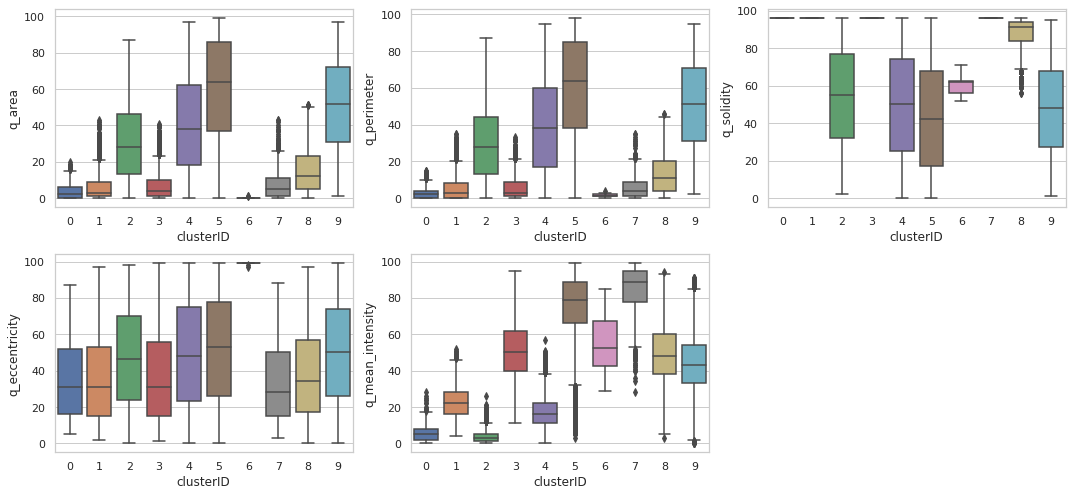

In [10]:
outfile = file+'.summary_stat.absolute.png'
df = pd.read_pickle(file)
df = df.rename(columns={"pairing": "clusterID"})
for c in df.columns[7:12]:
    df["q_"+c] = pd.qcut(df[c],100,labels=False, duplicates='drop')

f, axes = plt.subplots(2, 3, figsize=(15, 7))
sns.boxplot(x='clusterID', y='q_area', data=df, orient="v", ax=axes[0, 0])
sns.boxplot(x='clusterID', y='q_perimeter', data=df, orient="v", ax=axes[0, 1])
sns.boxplot(x='clusterID', y='q_solidity', data=df, orient="v", ax=axes[0, 2])
sns.boxplot(x='clusterID', y='q_eccentricity', data=df, orient="v", ax=axes[1, 0])
sns.boxplot(x='clusterID', y='q_mean_intensity', data=df, orient="v", ax=axes[1, 1])
axes[-1, -1].axis('off')
plt.tight_layout()
plt.show()
#plt.savefig(str(outfile))
    

In [ ]:
outfile = file+'.summary_stat.absolute.png'
df = pd.read_pickle(file)
df = df.rename(columns={"pairing": "clusterID"})
for c in df.columns[7:12]:
    df["q_"+c] = pd.qcut(df[c],100,labels=False, duplicates='drop')

In [65]:
import string
dic = {}
for x, y in zip(range(0,len(set(df["clusterID"]))), string.ascii_lowercase):
    dic[x]=y

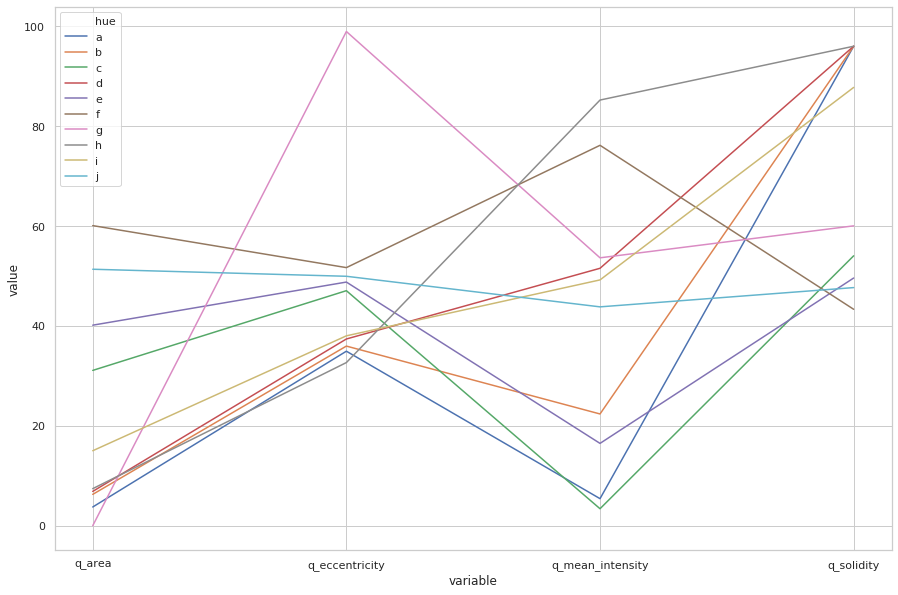

In [89]:
dfmelted = pd.DataFrame()
for c in set(df["clusterID"]):
    dfc = df[df["clusterID"] == c][["q_area","q_solidity","q_eccentricity","q_mean_intensity"]]
    data = pd.melt(dfc)
    data['hue'] = dic[c]
    dfmelted = dfmelted.append(data)
plt.figure(figsize=(15,10))
sns.lineplot(x="variable", y="value",hue='hue', data=dfmelted, ci=None,legend='full')
plt.legend(loc='upper left')
plt.show()

In [90]:
import numpy as np
profiles = np.zeros((len(set(df["clusterID"])),4))
row = 0
for c in set(df["clusterID"]):
    dfc = df[df["clusterID"] == c][["q_area","q_solidity","q_eccentricity","q_mean_intensity"]]
    profiles[row,:] = dfc.mean().values
    row += 1
profiles.shape

(10, 4)

In [117]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(profiles)
kmeans.labels_

array([0, 0, 1, 0, 1, 2, 3, 0, 0, 2], dtype=int32)

In [118]:
import string

dic2 = {}
for x, y in zip(string.ascii_lowercase, kmeans.labels_):
    dic2[x]=y
dfmelted['cluster'] = dfmelted.hue.map(dic2)

dic3 = {}
for x, y in zip(kmeans.labels_,string.ascii_uppercase):
    dic3[x]=y
dfmelted['cluster_hue'] = dfmelted.cluster.map(dic3)

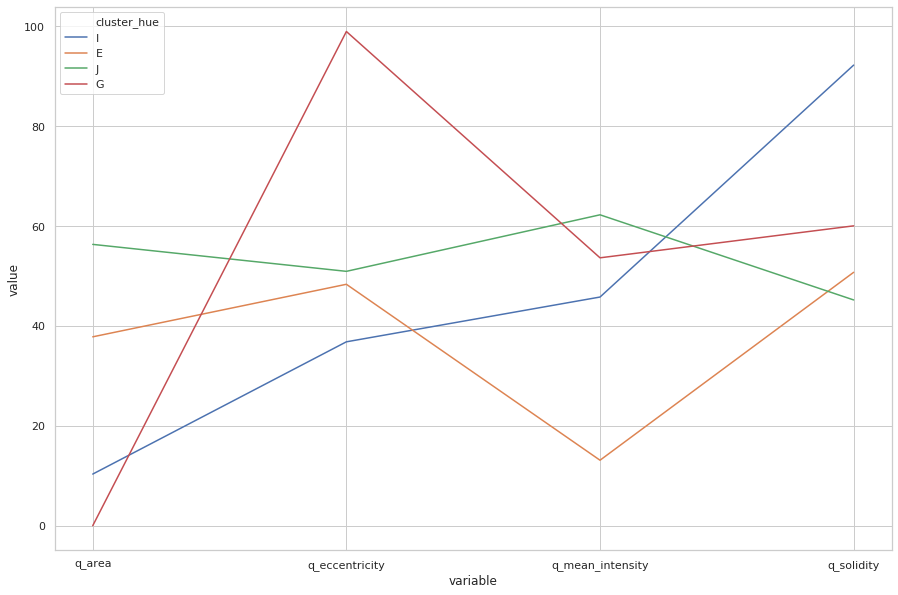

In [119]:
plt.figure(figsize=(15,10))
sns.lineplot(x="variable", y="value",hue='cluster_hue', data=dfmelted, ci=None,legend='full')
plt.legend(loc='upper left')
plt.show()